# Rain Forecasting for Australia

### Data set from [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [1]:
import numpy as np
import pandas as pd

# import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# hiding warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# importing dataset
data = './weatherAUS.csv'

df = pd.read_csv(data)

# EDA

In [3]:
df.shape

(145460, 23)

In [4]:
df.head(25)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# Null Values count
null_counts = round(df.isnull().sum()/len(df) * 100,2)
print('Percentages of Null values in Features :')
print(null_counts[null_counts > 0].sort_values(ascending=False))

Percentages of Null values in Features :
Sunshine         48.01
Evaporation      43.17
Cloud3pm         40.81
Cloud9am         38.42
Pressure9am      10.36
Pressure3pm      10.33
WindDir9am        7.26
WindGustDir       7.10
WindGustSpeed     7.06
Humidity3pm       3.10
WindDir3pm        2.91
Temp3pm           2.48
RainTomorrow      2.25
Rainfall          2.24
RainToday         2.24
WindSpeed3pm      2.11
Humidity9am       1.82
Temp9am           1.21
WindSpeed9am      1.21
MinTemp           1.02
MaxTemp           0.87
dtype: float64


In [8]:
print(round(df.describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

## Target variables
1) RainToday
2) RainTomorrow

In [9]:
print('Unique: ',df['RainToday'].unique())
print('Nulls %: ',round(df['RainToday'].isnull().sum()/len(df)*100,3))

Unique:  ['No' 'Yes' nan]
Nulls %:  2.242


In [10]:
print('Unique: ',df['RainTomorrow'].unique())
df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

Unique:  ['No' 'Yes' nan]


No     75.839406
Yes    21.914616
NaN     2.245978
Name: RainTomorrow, dtype: float64

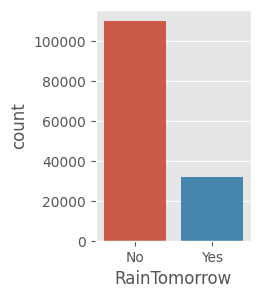

In [11]:
f, ax = plt.subplots(figsize=(2, 3))
ax = sns.countplot(x="RainTomorrow", data=df)
plt.show()

## EDA of Categorical Variables

In [12]:
cats = [var for var in df.columns if df[var].dtype=='O']
print('Number of variables: ',len(cats))
print('Variables :', cats)

Number of variables:  7
Variables : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
df[cats].head(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
5,2008-12-06,Albury,WNW,W,W,No,No
6,2008-12-07,Albury,W,SW,W,No,No
7,2008-12-08,Albury,W,SSE,W,No,No
8,2008-12-09,Albury,NNW,SE,NW,No,Yes
9,2008-12-10,Albury,W,S,SSE,Yes,No


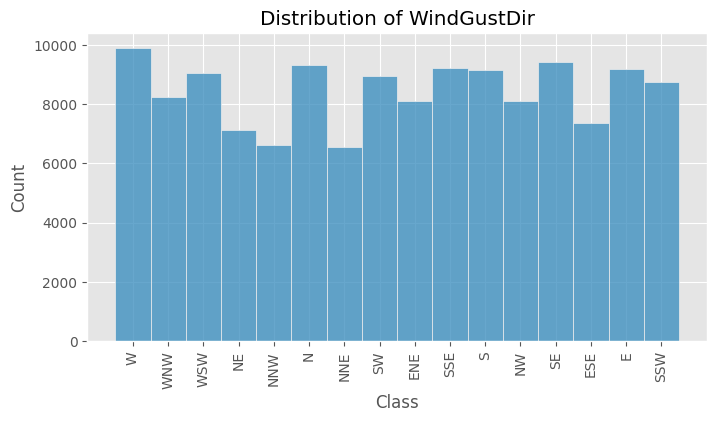

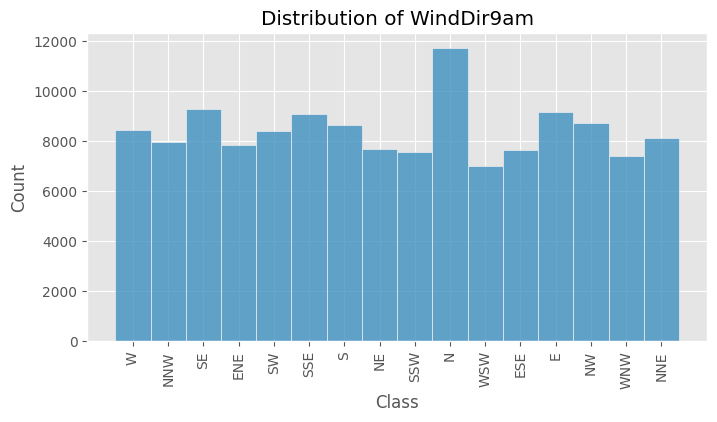

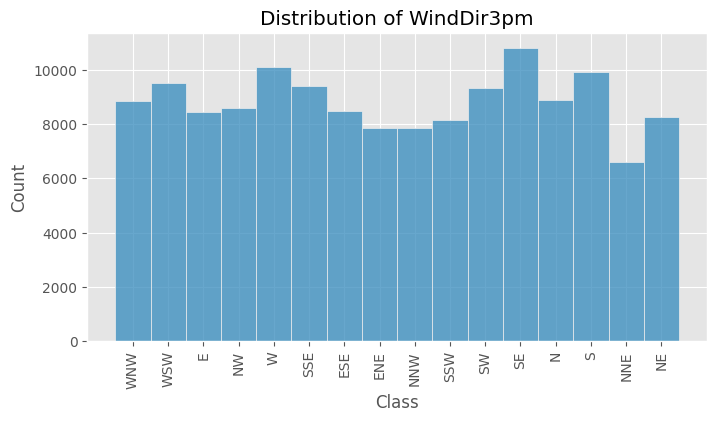

In [14]:

for col in cats:
    if col != 'Date' and col != 'Location' and col != 'RainToday' and col != 'RainTomorrow':
        plt.figure(figsize=(8,4))
        sns.histplot(data=df, x=col)
        temp = 'Distribution of {0}'.format(col)
        plt.title(temp)
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

### Checking for high cardinality

In [15]:
print('Uniques in Categorical Variables')
for cols in cats:
    print('<{0}> : {1}'.format(cols,len(df[cols].unique())))

Uniques in Categorical Variables
<Date> : 3436
<Location> : 49
<WindGustDir> : 17
<WindDir9am> : 17
<WindDir3pm> : 17
<RainToday> : 3
<RainTomorrow> : 3


Text(0.5, 1.0, 'Cardinality Check for Categorical Variable')

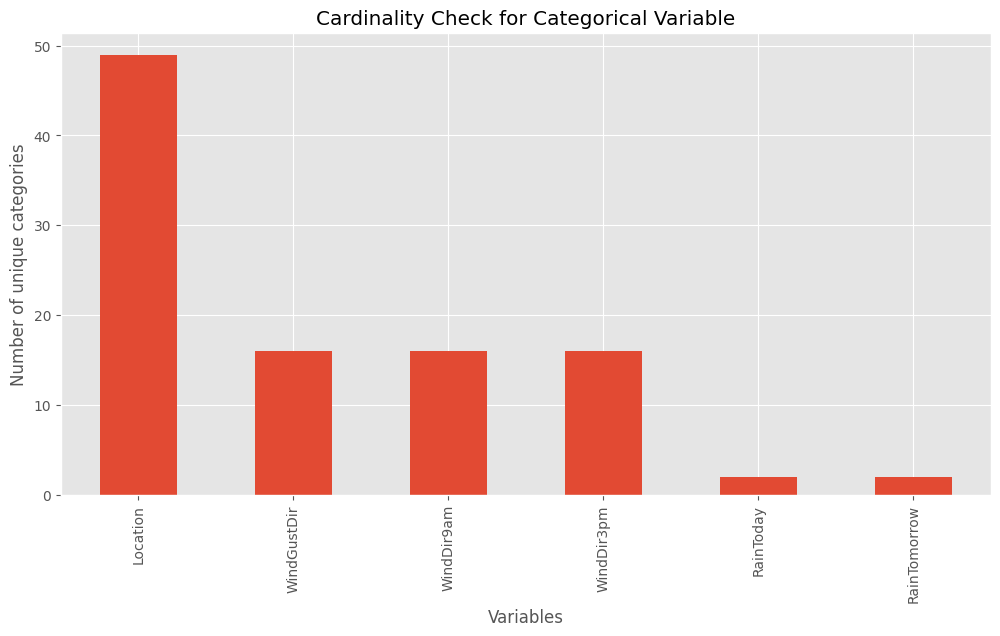

In [19]:
df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']].nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality Check for Categorical Variable')

In [16]:
# Null Values in descending order
null_counts = round(df[cats].isnull().sum()/len(df)*100,3)
print("Null % in categorical variables:")
null_counts.sort_values(ascending=False)

Null % in categorical variables:


WindDir9am      7.264
WindGustDir     7.099
WindDir3pm      2.907
RainTomorrow    2.246
RainToday       2.242
Date            0.000
Location        0.000
dtype: float64

In [17]:
# unique of locations
print('There are',len(df['Location'].unique())," Unique of \'Location\':",df['Location'].unique())

There are 49  Unique of 'Location': ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [64]:
df[['Rainfall','RainToday']]

,Rainfall,RainToday
0,0.6,Yes
1,0.0,No
2,0.0,No
3,0.0,No
4,1.0,Yes
...,...,...
145455,0.0,No
145456,0.0,No
145457,0.0,No
145458,0.0,No


In [63]:
for index,row in df.iterrows():
    if df['Rainfall'][index] > 0:
        df['RainToday'][index] = 'Yes'

In [ ]:
# Observing things we will replace missing with mode
for col in cats:
    if col != 'Location' and col != 'Date':
        df[col] = df[col].replace(np.nan,df[col].mode()[0])

## EDA of Numerical Variables

In [19]:
num_cols = []
for col in df:
    if df[col].dtype == 'float64':
        num_cols.append(col)

In [20]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [21]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

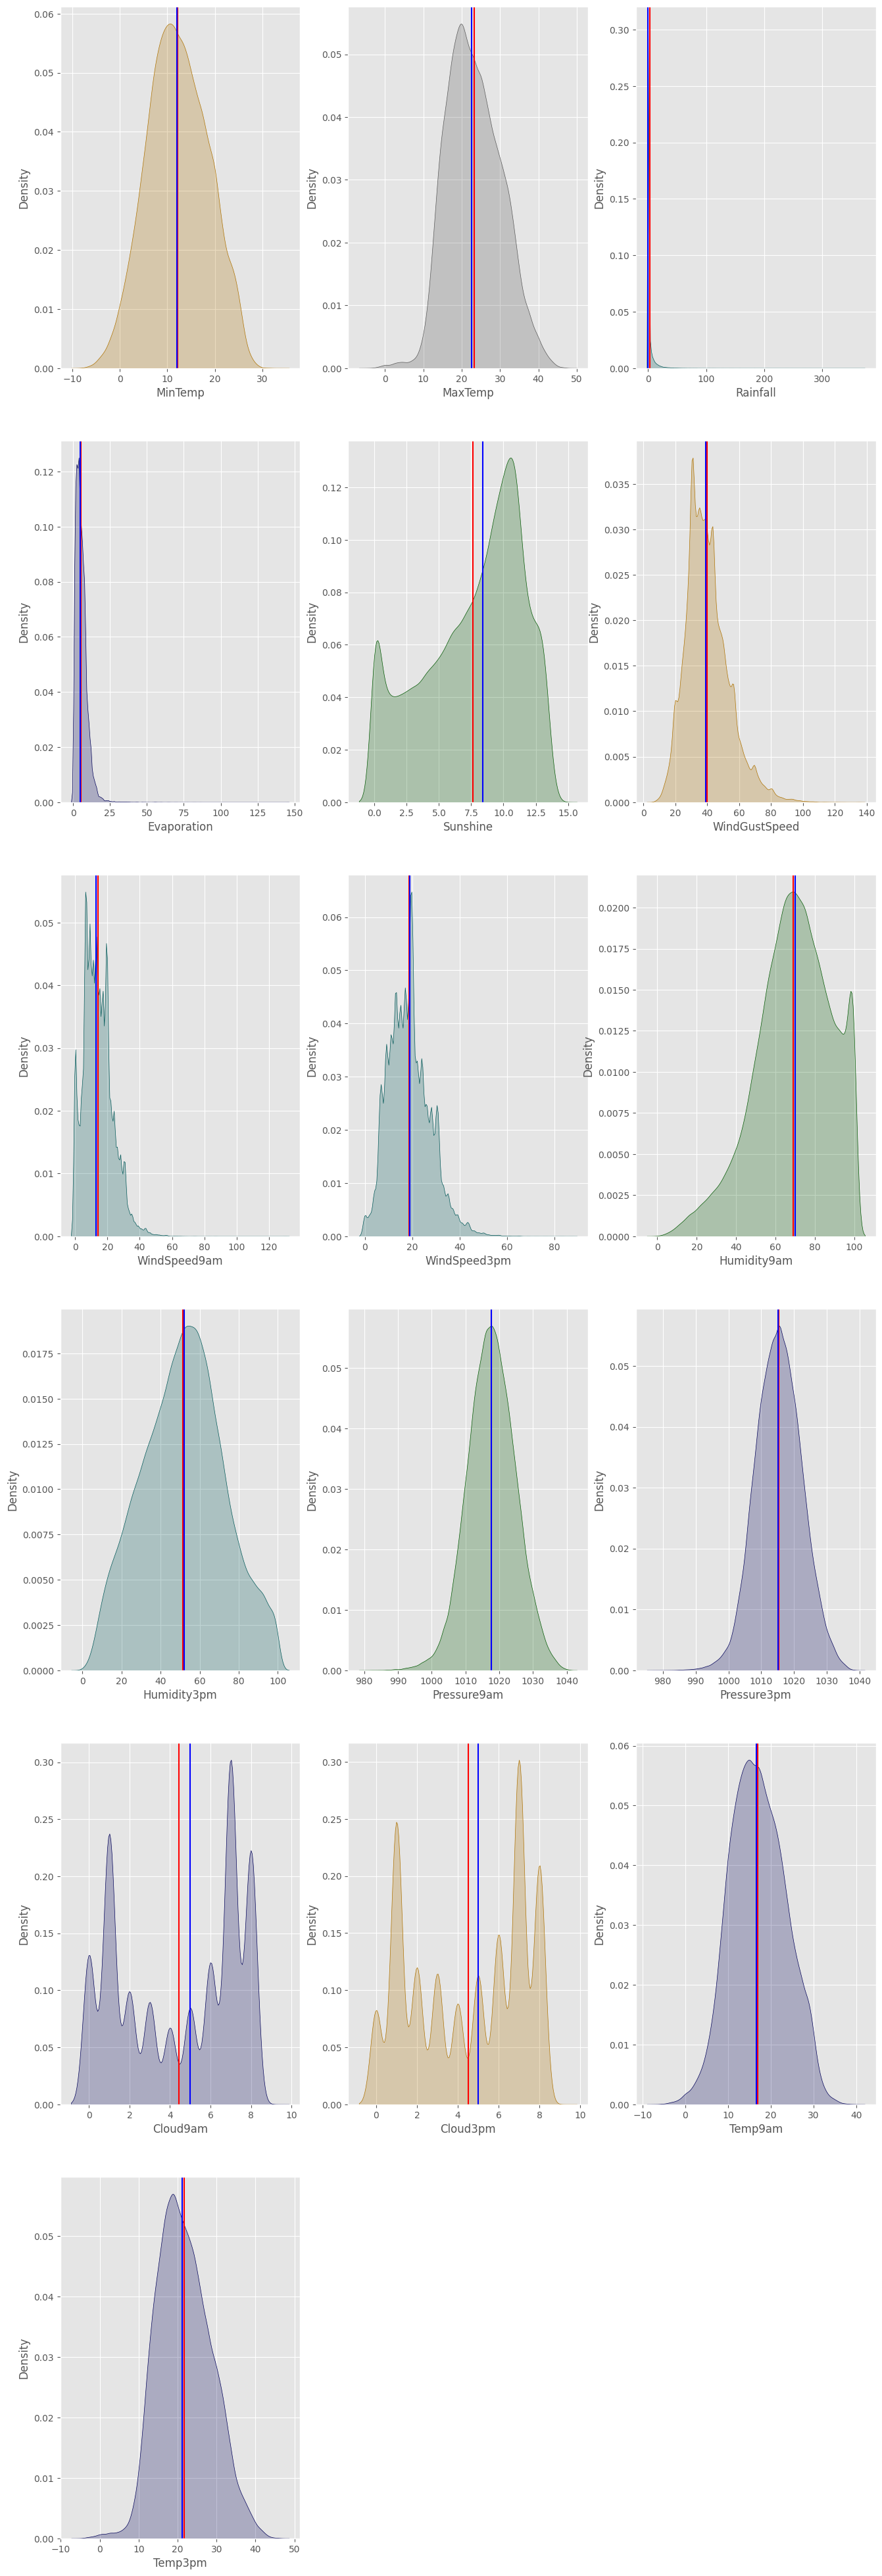

In [22]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[num_cols].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])
    plt.axvline(x=df[col].mean(),
            color='red')
    plt.axvline(x=df[col].median(),
            color='blue')

In [23]:
# After checking the normalization
# Replacing NaN values to Mean of respective column
for col in num_cols:
    df[col] = df[col].replace(np.nan, df[col].mean())

In [24]:
null_counts = round(df.isnull().sum()/len(df) * 100,2)
print('Percentages of Null values in Features :')
print(null_counts[null_counts > 0].sort_values(ascending=False))
# 0 nulls now

Percentages of Null values in Features :
Series([], dtype: float64)


## Heatmap for correlation

In [71]:
Labeler = LabelEncoder()
df['RainToday'] = Labeler.fit_transform(df['RainToday'])
df['RainTomorrow'] = Labeler.fit_transform(df['RainTomorrow'])

In [73]:
df[['RainToday','RainTomorrow']]

,RainToday,RainTomorrow
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


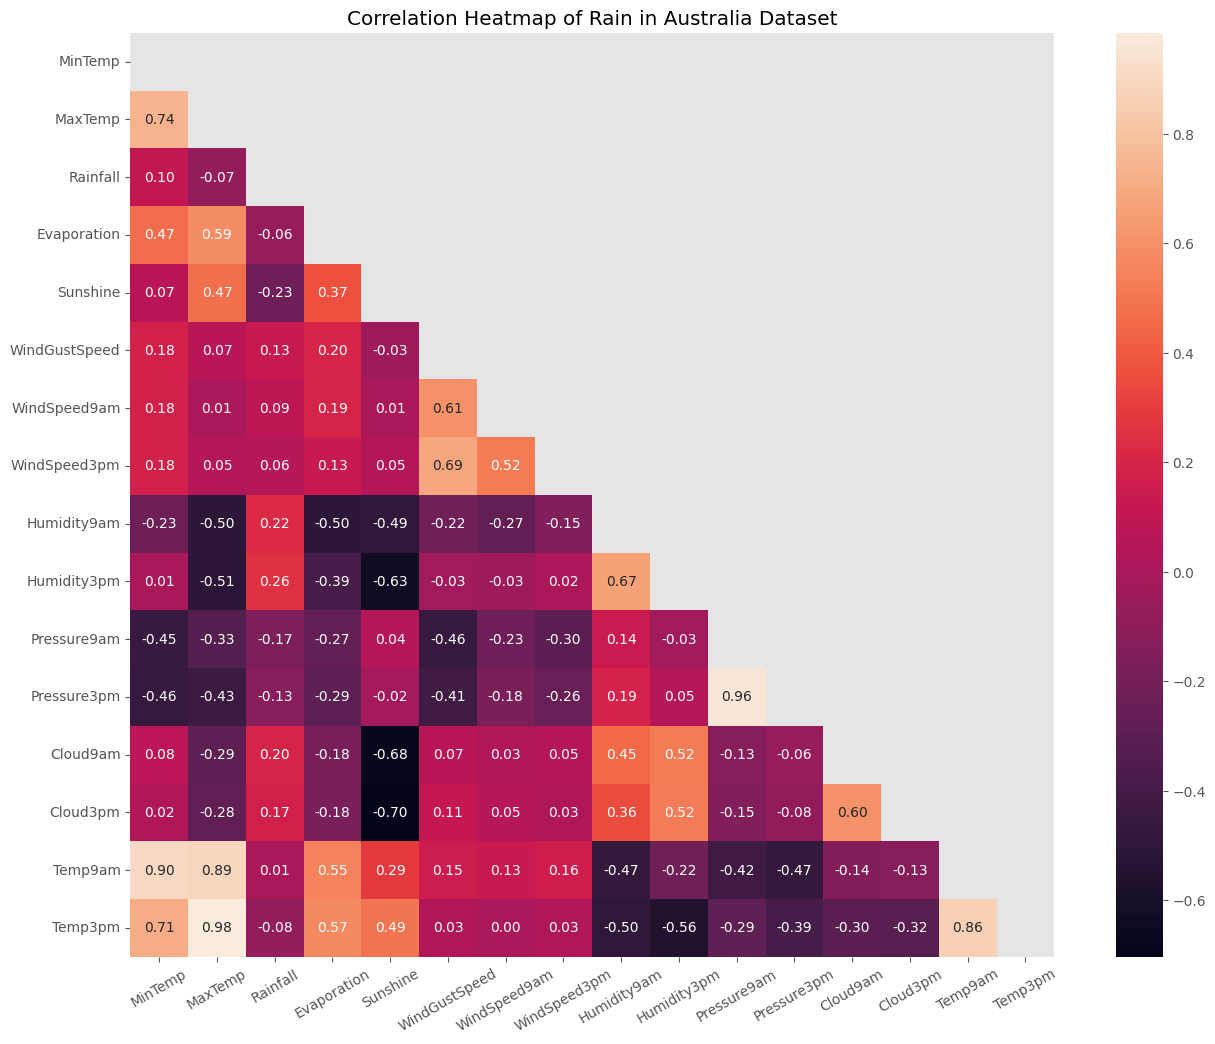

In [20]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(df.corr(), annot=True, square=True,  fmt='.2f',mask=mask )
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
sns.axes_style("white")
plt.show()

In [76]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
y, X = dmatrices('RainToday ~ MinTemp+MaxTemp+Rainfall+Evaporation+Sunshine+Humidity9am+Humidity3pm+Pressure9am+Pressure3pm+Cloud9am+Cloud3pm+Temp3pm+Temp9am', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_tomorrow = pd.DataFrame()
vif_tomorrow['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_tomorrow['Features'] = X.columns
vif_tomorrow

,VIF,Features
0,32040.544068,Intercept
1,10.028495,MinTemp
2,43.550294,MaxTemp
3,1.159974,Rainfall
4,2.201594,Evaporation
5,3.243247,Sunshine
6,4.027628,Humidity9am
7,6.611909,Humidity3pm
8,19.692239,Pressure9am
9,19.812638,Pressure3pm


In [80]:
from sklearn.decomposition import PCA

In [81]:
df = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))

pca = PCA(n_components=5)
pca.fit(df)

PCA(n_components=5)

In [82]:
pca.components_ 

array([[ 0.26688066, -0.10830214, -0.08445577, -0.54758404,  0.01302575,
        -0.10411589, -0.65598635, -0.36277263,  0.1918425 ,  0.01813543],
       [ 0.52453424,  0.05090003,  0.35920951,  0.12035856, -0.46221109,
        -0.18074681, -0.24411541,  0.4772207 , -0.18917578, -0.09657877],
       [-0.04975779,  0.71993654, -0.20414793,  0.15436491,  0.21004788,
        -0.43184763, -0.16013769,  0.15421437,  0.33552833, -0.1452334 ],
       [ 0.70741508,  0.08629418,  0.08559924,  0.04408759,  0.16773098,
         0.08576016,  0.48127963, -0.34050873,  0.27905962, -0.14801095],
       [ 0.0203026 , -0.13015747, -0.00418884, -0.15870094,  0.36196985,
        -0.4450237 ,  0.09418555, -0.07343273, -0.59078236, -0.51486694]])